In [1]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
# 1). From dataset, I am taking only one column i.e. open column.


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

"""******************************************************************************************************************************"""





'******************************************************************************************************************************'

In [2]:
# Creating a data structure with 60 timesteps and 1 output

# 1). In one 'for' loop given below, taking initial 60 values as x_train and 61th value as y_train.
# 2). Increasing the timesteps will increase the accuracy.

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
	# 1). In one 'for' loop, taking initial 60 values as x_train and 61th value as y_train.
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Reshaping the x_train itno 3-D, because tensorflow support it only.

"""******************************************************************************************************************************"""



'******************************************************************************************************************************'

In [3]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation

# 1). In RNN, we only use LSTM layer and Output layer.

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
print("Increase the number of epochs for more accuracy.")
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

"""******************************************************************************************************************************"""




Using TensorFlow backend.
W0612 13:46:43.110128  2160 deprecation_wrapper.py:118] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0612 13:46:43.127496  2160 deprecation_wrapper.py:118] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0612 13:46:43.133018  2160 deprecation_wrapper.py:118] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0612 13:46:43.312681  2160 deprecation_wrapper.py:118] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W061

Increase the number of batches for more accuracy.


W0612 13:46:44.245847  2160 deprecation.py:323] From C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0612 13:46:46.763637  2160 deprecation_wrapper.py:118] From C:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0508
Epoch 2/10
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 3/10
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0061
Epoch 4/10
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0051
Epoch 5/10
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0052
Epoch 6/10
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 7/10
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 8/10
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 9/10
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 10/10
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045


'******************************************************************************************************************************'

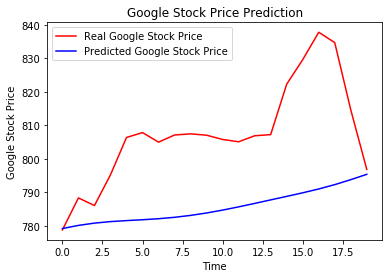

'**********************************************************************************************************************************'

In [4]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
       # 1). Here inputs variable contains last 60 values of dataset_train and all values of dataset_test.
	   
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):   # Here len(dataset_total) = 80 .
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# 1). -->> Use below code to check error.
#     from sklearn.metrics import mean_squared_error
#     rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
#     print(rmse)      # Here we are getting rmse of 32 ruppes.
#    print(f" error percentage:-> {rmse*100/(real_stock_price.mean())} ")

# This is how we increase accuracy in RNN:-
# 1). Increasing timesteps will increase accuracy.
# 2). Increasing dataset will increase accuracy.
# 3). Increasing LSTM layers will increase accuracy.
# 4). Increasing Number of nodes in LSTM layers will increase accuracy.


"""*********************************************************************************************************************************"""



"""******************************************************************************************************************************"""

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

"""**********************************************************************************************************************************"""



## ===================================================================